In [4]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})
star_mass = np.array([5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])#up to 22?
metalicity = ['1'] #['001','01','1','2']
rsol = 6.96e10 #cm
msol = 1.989e33 #grams
lsol = 3.839e33 #ergs
G = 6.67259e-8 #grav constant CGS

In [5]:
##define the functions needed for 
def b1(z):
    return 14.38*(np.log10(z)**2) + 57.41*np.log10(z) + 95.68

def a2(z):
    return -16.91*(np.log10(z)**2) -81.93*np.log10(z) - 47.87

def b2(z):
    return 184.02*(np.log10(z)**2) + 872.19*np.log10(z) + 369.75

def c2(z):
    return -660.1*(np.log10(z)**2) - 3482.35*np.log10(z) + 1488.91


def M_conv_max_func(star_mass, M_core_max,gamma):
    return star_mass - (1+gamma)*M_core_max

def T_norm_func(logLTAMS, a2, b2 ,c2):
    return a2*logLTAMS**2 + b2*logLTAMS + c2

def M_conv_func(T_eff,T_norm,b1,M_conv_max):
    return M_conv_max/(1+np.exp(b1*((T_eff/T_norm)-1)))

def M_conv_new(T_eff, Tonset, Tmin, M_conv_max, param):
    return M_conv_max/(1+np.exp((-2*param*T_eff + param*Tmin + param*Tonset)/(Tmin - Tonset)))

gamma = 0.05

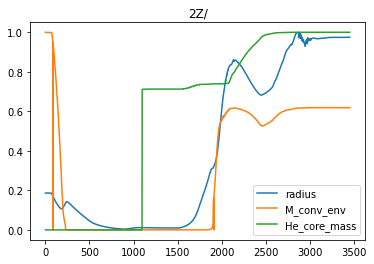

2131 2870


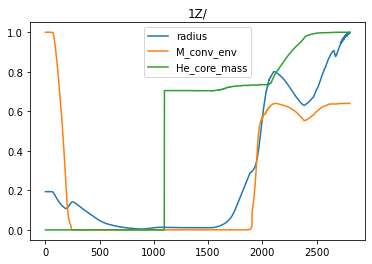

2107 2805


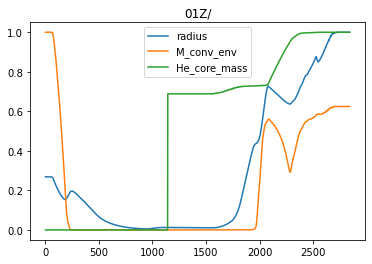

2077 2840


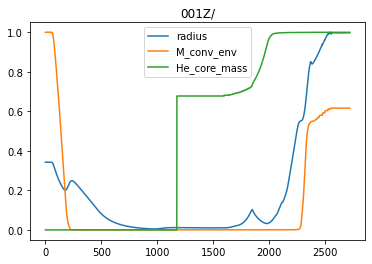

1847 2546


In [34]:
Z_dir = ['2Z/','1Z/','01Z/','001Z/']
for i in Z_dir:
    data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Recombination/' + i + '15M/history.data')
#     plt.figure(figsize = (16,10))
    plt.plot(data.model_number,data.radius_cm/max(data.radius_cm), label = 'radius')
    plt.plot(data.model_number,data.M_conv_env/max(data.M_conv_env), label = 'M_conv_env')
    plt.plot(data.model_number,data.he_core_mass/max(data.he_core_mass), label = 'He_core_mass')
    plt.legend()
    plt.title(i)
    plt.show()
    if i == '2Z/':
        max_radius1 = max(data.radius_cm[2000:2500])
        max_radius2 = max(data.radius_cm[2500:3500])
        int1 = np.where(data.radius_cm == max_radius1)[0][0]
        int2 = np.where(data.radius_cm == max_radius2)[0][0]
    elif i =='1Z/':
        max_radius1 = max(data.radius_cm[2000:2500])
        max_radius2 = max(data.radius_cm[2500:3500])
        int1 = np.where(data.radius_cm == max_radius1)[0][0]
        int2 = np.where(data.radius_cm == max_radius2)[0][0]    
    elif i =='01Z/':
        max_radius1 = max(data.radius_cm[1800:2200])
        max_radius2 = max(data.radius_cm[2200:])
        int1 = np.where(data.radius_cm == max_radius1)[0][0]
        int2 = np.where(data.radius_cm == max_radius2)[0][0]    
    else:
        max_radius1 = max(data.radius_cm[1500:2000])
        max_radius2 = max(data.radius_cm[2000:])
        int1 = np.where(data.radius_cm == max_radius1)[0][0]
        int2 = np.where(data.radius_cm == max_radius2)[0][0]
    print(int1,int2)

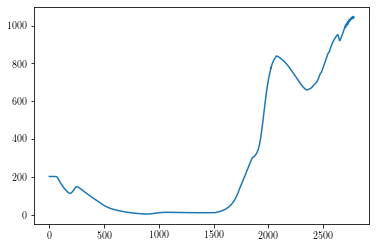

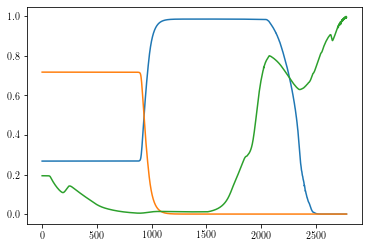

1226 12.02051837558427 4.705605459650989


In [13]:
data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Updated_overshoot/1Z/15M/history.data')

plt.plot(data.model_number,data.radius_cm/rsol)
plt.show()
plt.plot(data.model_number,data.center_he4)
plt.plot(data.model_number,data.center_h1)
plt.plot(data.model_number,data.radius_cm/max(data.radius_cm))
plt.show()

radius = []
for j in range(len(data.star_age)):
    if (data.center_he4[j] > 0.986):
        radius.append(data.radius_cm[j])#this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core hel
r_min = min(radius) #min radius roughly at TAMS
index_l = int(np.where(data.radius_cm == radius[0])[0][0]) #lower index

print(index_l,data.radius_cm[index_l+30]/rsol, min(data.radius_cm)/rsol)

2270 711.0776891471704
ms_start =  885 radius= 4.705605459650989
index_l =  978 radius= 9.963016013553583
index_u =  2074 radius= 839.4533862671059
index_f =  2537 radius= 842.1282540230967


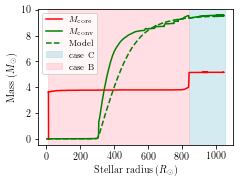

0.18308742462827787
758.0464494995065
(1431,)


In [14]:
#this is for 1Z
data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Updated_overshoot/1Z/15M/history.data')

ms_start = np.where(data.radius_cm == min(data.radius_cm))[0][0]
radius = []
for j in range(len(data.star_age)):
    if (data.center_he4[j] > 0.8): #this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core helium ignition
        radius.append(data.radius_cm[j])
r_min = min(radius) #min radius roughly at TAMS
index_l = int(np.where(data.radius_cm == r_min)[0][0]) #lower index
r_max = max(radius) #max radius
index_u = int(np.where(data.radius_cm == r_max)[0][0]) #upper index for end of HG
index_f = 2537 #for 1Z

end_ms = np.where(data.log_LHe>data.log_LH)[0][0]
print(end_ms, data.radius_cm[end_ms]/rsol)
# raise

print("ms_start = ",ms_start, 'radius=', data.radius_cm[ms_start]/rsol)
print("index_l = ",index_l, 'radius=', data.radius_cm[index_l]/rsol)
print("index_u = ",index_u, 'radius=', data.radius_cm[index_u]/rsol)
print("index_f = ",index_f, 'radius=', data.radius_cm[index_f]/rsol)

radius= np.array([])
radius = np.append(radius,data.radius_cm[ms_start:index_u])
radius= np.append(radius, data.radius_cm[index_f:])
radius = radius/rsol

core_mass = np.array([])
core_mass = np.append(core_mass,data.he_core_mass[ms_start:index_u])
core_mass = np.append(core_mass,data.he_core_mass[index_f:])

M_conv_env = np.array([])
M_conv_env = np.append(M_conv_env,data.M_conv_env[ms_start:index_u])
M_conv_env = np.append(M_conv_env,data.M_conv_env[index_f:])
M_conv_env = M_conv_env/msol

M_inter = np.array([])
M_inter = np.append(M_inter,data.M_inter[ms_start:index_u])
M_inter = np.append(M_inter,data.M_inter[index_f:])
M_inter = M_inter/msol

T_eff = np.array([])
T_eff = np.append(T_eff, data.effective_T[ms_start:index_u])
T_eff = np.append(T_eff, data.effective_T[index_f:])

z = 0.014
func = M_conv_func(T_eff,T_norm_func(4.6057, a2(z), b2(z) ,c2(z)), b1(z),M_conv_max_func(15, max(core_mass),gamma))

new_func = M_conv_new(T_eff, 4152, min(data.effective_T), M_conv_max_func(15, max(core_mass),0.04239904), 4.6)

plt.figure(figsize=(3.5, 2.5))
plt.plot(radius,core_mass,label='$M_\mathrm{core}$', color = 'r',linestyle = 'solid')
plt.plot(radius,M_conv_env, label = '$M_\mathrm{conv}$', color = 'g', linestyle = 'solid')
# plt.plot(radius,M_inter, label = '$M_{inter}$', color = 'b', linestyle = 'solid')
# plt.plot(radius,func, label = 'MESA', color = 'purple', linestyle = 'solid')
plt.plot(radius,new_func, label = 'Model', color = 'g', linestyle = '--')
plt.axvspan(843,1051, alpha=0.5, color = 'lightblue',label = 'case C')
plt.axvspan(data.radius_cm[1226]/rsol,843, alpha=0.5, color = 'pink', label = 'case B')


plt.legend(loc = 'best', fontsize = 'small')
plt.xlabel("Stellar radius $(R_{\odot})$")
plt.ylabel('Mass $(M_{\odot})$')
# plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/presentation', bbox_inches='tight', dpi = 600)
plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/15M_1Z_radius.pdf', bbox_inches='tight', dpi = 300)
plt.show()

print((np.max(M_conv_env[1100:] - new_func[1100:])))
print(radius[1130])
print(M_conv_env.shape)

ms_start =  889
index_l =  981
index_u =  2131
index_f =  2698


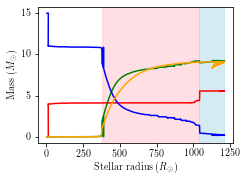

In [17]:
#this is for 2Z
data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Updated_overshoot/2Z/15M/history.data')
ms_start = np.where(data.radius_cm == min(data.radius_cm))[0][0]
radius = []
for j in range(len(data.star_age)):
    if (data.center_he4[j] > 0.8): #this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core helium ignition
        radius.append(data.radius_cm[j])
r_min = min(radius) #min radius roughly at TAMS
index_l = int(np.where(data.radius_cm == r_min)[0][0]) #lower index
r_max = max(radius) #max radius
index_u = int(np.where(data.radius_cm == r_max)[0][0]) #upper index for end of HG
index_f = 2698 #for 2Z

print("ms_start = ",ms_start)
print("index_l = ",index_l)
print("index_u = ",index_u)
print("index_f = ",index_f)

radius= np.array([])
radius = np.append(radius,data.radius_cm[ms_start:index_u])
radius= np.append(radius, data.radius_cm[index_f:])
radius = radius/rsol

core_mass = np.array([])
core_mass = np.append(core_mass,data.he_core_mass[ms_start:index_u])
core_mass = np.append(core_mass,data.he_core_mass[index_f:])

M_conv_env = np.array([])
M_conv_env = np.append(M_conv_env,data.M_conv_env[ms_start:index_u])
M_conv_env = np.append(M_conv_env,data.M_conv_env[index_f:])
M_conv_env = M_conv_env/msol

M_inter = np.array([])
M_inter = np.append(M_inter,data.M_inter[ms_start:index_u])
M_inter = np.append(M_inter,data.M_inter[index_f:])
M_inter = M_inter/msol

T_eff = np.array([])
T_eff = np.append(T_eff, data.effective_T[ms_start:index_u])
T_eff = np.append(T_eff, data.effective_T[index_f:])

z = 0.03
func = M_conv_func(T_eff,T_norm_func(4.669, a2(z), b2(z) ,c2(z)), b1(z),M_conv_max_func(15, max(core_mass),gamma))

new_func = M_conv_new(T_eff, 4000, min(data.effective_T), M_conv_max_func(15, max(core_mass),0.03560721), 4.6)

plt.figure(figsize=(3.5, 2.5))
plt.plot(radius,core_mass,label='core mass', color = 'r',linestyle = 'solid')
plt.plot(radius,M_conv_env, label = 'M_conv', color = 'g', linestyle = 'solid')
plt.plot(radius,M_inter, label = 'M_inter', color = 'b', linestyle = 'solid')
# plt.plot(radius,func, label = 'func', color = 'purple', linestyle = 'solid')
plt.plot(radius,new_func, label = 'Model', color = 'orange', linestyle = 'solid')
plt.axvspan(1040,1210, alpha=0.5, color = 'lightblue',label = 'case C')
plt.axvspan(380,1040, alpha=0.5, color = 'pink', label = 'case B')


# plt.legend()
plt.xlabel("Stellar radius $(R_{\odot})$")
plt.ylabel('Mass $(M_{\odot})$')

plt.show()

ms_start =  929
index_l =  1020
index_u =  2077
index_f =  2381


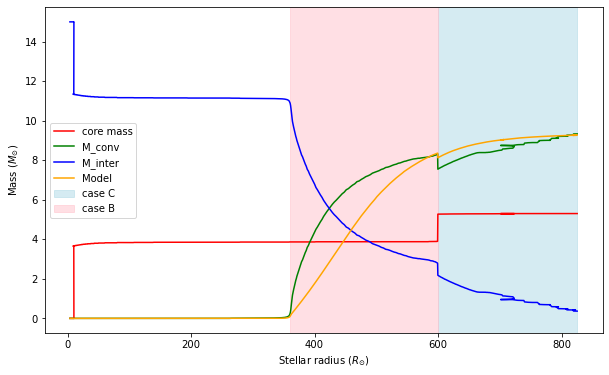

In [108]:
data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Updated_overshoot/01Z/15M/history.data')

ms_start = np.where(data.radius_cm == min(data.radius_cm))[0][0]
radius = []
for j in range(len(data.star_age)):
    if (data.center_he4[j] > 0.8): #this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core helium ignition
        radius.append(data.radius_cm[j])
r_min = min(radius) #min radius roughly at TAMS
index_l = int(np.where(data.radius_cm == r_min)[0][0]) #lower index
r_max = max(radius) #max radius
index_u = int(np.where(data.radius_cm == r_max)[0][0]) #upper index for end of HG
index_f = 2381 #for 01Z

print("ms_start = ",ms_start)
print("index_l = ",index_l)
print("index_u = ",index_u)
print("index_f = ",index_f)

radius= np.array([])
radius = np.append(radius,data.radius_cm[ms_start:index_u])
radius= np.append(radius, data.radius_cm[index_f:])
radius = radius/rsol

core_mass = np.array([])
core_mass = np.append(core_mass,data.he_core_mass[ms_start:index_u])
core_mass = np.append(core_mass,data.he_core_mass[index_f:])

M_conv_env = np.array([])
M_conv_env = np.append(M_conv_env,data.M_conv_env[ms_start:index_u])
M_conv_env = np.append(M_conv_env,data.M_conv_env[index_f:])
M_conv_env = M_conv_env/msol

M_inter = np.array([])
M_inter = np.append(M_inter,data.M_inter[ms_start:index_u])
M_inter = np.append(M_inter,data.M_inter[index_f:])
M_inter = M_inter/msol

T_eff = np.array([])
T_eff = np.append(T_eff, data.effective_T[ms_start:index_u])
T_eff = np.append(T_eff, data.effective_T[index_f:])

z = 0.0014
func = M_conv_func(T_eff,T_norm_func(4.6178, a2(z), b2(z) ,c2(z)), b1(z),M_conv_max_func(15, max(core_mass),gamma))

new_func = M_conv_new(T_eff, 4400, min(data.effective_T), M_conv_max_func(15, max(core_mass),0.06330772), 4.6)

plt.figure(figsize = (10,6))
plt.plot(radius,core_mass,label='core mass', color = 'r',linestyle = 'solid')
plt.plot(radius,M_conv_env, label = 'M_conv', color = 'g', linestyle = 'solid')
plt.plot(radius,M_inter, label = 'M_inter', color = 'b', linestyle = 'solid')
# plt.plot(radius,func, label = 'func', color = 'purple', linestyle = 'solid')
plt.plot(radius,new_func, label = 'Model', color = 'orange', linestyle = 'solid')
plt.axvspan(600,825, alpha=0.5, color = 'lightblue',label = 'case C')
plt.axvspan(360,600, alpha=0.5, color = 'pink', label = 'case B')


plt.legend()
plt.xlabel("Stellar radius $(R_{\odot})$")
plt.ylabel('Mass $(M_{\odot})$')

plt.show()

ms_start =  963
index_l =  1054
index_u =  1847
index_f =  2088


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


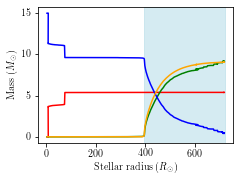

In [14]:
data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Updated_overshoot/001Z/15M/history.data')

ms_start = np.where(data.radius_cm == min(data.radius_cm))[0][0]
radius = []
for j in range(len(data.star_age)):
    if (data.center_he4[j] > 0.8): #this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core helium ignition
        radius.append(data.radius_cm[j])
r_min = min(radius) #min radius roughly at TAMS
index_l = int(np.where(data.radius_cm == r_min)[0][0]) #lower index
r_max = max(radius) #max radius
index_u = int(np.where(data.radius_cm == r_max)[0][0]) #upper index for end of HG
index_f = 2088 #for 001Z

print("ms_start = ",ms_start)
print("index_l = ",index_l)
print("index_u = ",index_u)
print("index_f = ",index_f)

radius= np.array([])
radius = np.append(radius,data.radius_cm[ms_start:index_u])
radius= np.append(radius, data.radius_cm[index_f:])
radius = radius/rsol

core_mass = np.array([])
core_mass = np.append(core_mass,data.he_core_mass[ms_start:index_u])
core_mass = np.append(core_mass,data.he_core_mass[index_f:])

M_conv_env = np.array([])
M_conv_env = np.append(M_conv_env,data.M_conv_env[ms_start:index_u])
M_conv_env = np.append(M_conv_env,data.M_conv_env[index_f:])
M_conv_env = M_conv_env/msol

M_inter = np.array([])
M_inter = np.append(M_inter,data.M_inter[ms_start:index_u])
M_inter = np.append(M_inter,data.M_inter[index_f:])
M_inter = M_inter/msol

T_eff = np.array([])
T_eff = np.append(T_eff, data.effective_T[ms_start:index_u])
T_eff = np.append(T_eff, data.effective_T[index_f:])

z = 0.00014
func = M_conv_func(T_eff,4277, b1(z),M_conv_max_func(15, max(core_mass),gamma))
new_func = M_conv_new(T_eff, 4500, min(data.effective_T), M_conv_max_func(15, max(core_mass),0.0842164), 4.6)

plt.figure(figsize=(3.5, 2.5))
plt.plot(radius,core_mass,label='core mass', color = 'r',linestyle = 'solid')
plt.plot(radius,M_conv_env, label = '$M_{conv}$', color = 'g', linestyle = 'solid')
plt.plot(radius,M_inter, label = '$M_{inter}$', color = 'b', linestyle = 'solid')
# plt.plot(radius,func, label = 'MESA', color = 'purple', linestyle = 'solid')
plt.plot(radius,new_func, label = 'Model', color = 'orange', linestyle = 'solid')
plt.axvspan(395,720, alpha=0.5, color = 'lightblue',label = 'case C')
# plt.axvspan(308,843, alpha=0.5, color = 'pink', label = 'case B')


# plt.legend(fontsize = 12, loc = 'center left')
plt.xlabel("Stellar radius $(R_{\odot})$")
plt.ylabel('Mass $(M_{\odot})$')
plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/15M_001Z_radius.pdf', bbox_inches='tight')

plt.show()

In [39]:
np.log10(4500)

3.6532125137753435